# Iraqi students

Dataset: Private

Author: https://github.com/mohammedmahdiali

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_excel('../students.xlsx')
data.head()

C:\Users\muhammed\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,الرقم الامتحاني,اسم الطالب,متخرج في,فرع الدراسة,المجموع,جهة القبول
0,141512094166,وفاء حمودي صالح حمودي,ثانوية المتميزات,علمي,715.000000,جامعة بغداد/الطب
1,101512078020,داليا قصي محمد صالح ناصر,ثانوية المتميزات - المنصور,علمي,715.000000,جامعة بغداد/الصيدلة
2,101512078047,زينب عبد السلام حمود جاسم,ثانوية المتميزات - المنصور,علمي,714.799988,جامعة بغداد/الطب
3,141512094137,مريم خليل إبراهيم محمود,ثانوية المتميزات,علمي,713.700012,جامعة بغداد/الطب
4,141512094055,رند عبد الجبار إدريس جبري,ثانوية المتميزات,علمي,713.599976,جامعة بغداد/الطب


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99652 entries, 0 to 99651
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   الرقم الامتحاني  99652 non-null  int64  
 1   اسم الطالب       99652 non-null  object 
 2   متخرج في         99652 non-null  object 
 3   فرع الدراسة      99652 non-null  object 
 4   المجموع          99652 non-null  float64
 5   جهة القبول       99652 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.6+ MB


In [4]:
data.columns

Index(['الرقم الامتحاني', 'اسم الطالب', 'متخرج في', 'فرع الدراسة', 'المجموع',
       'جهة القبول'],
      dtype='object')

In [5]:
data.columns = [col.replace(' ', '_') for col in data.columns]
data.columns

Index(['الرقم_الامتحاني', 'اسم_الطالب', 'متخرج_في', 'فرع_الدراسة', 'المجموع',
       'جهة_القبول'],
      dtype='object')

### تنظيف البيانات

* **الرقم_الامتحاني**

In [6]:
data['الرقم_الامتحاني'] = data['الرقم_الامتحاني'].apply(str)
data['الرقم_الامتحاني'].unique()[:200]

array(['141512094166', '101512078020', '101512078047', '141512094137',
       '141512094055', '231512132059', '101512078112', '111512113016',
       '131511020103', '251512074053', '271511029040', '141512094100',
       '141511007127', '101511048006', '271512077050', '141512094164',
       '101512078017', '251512074012', '231512132053', '141512094046',
       '271512077061', '251512074013', '231511047053', '101511028102',
       '211512143107', '231511021073', '141512091001', '141512094132',
       '231512132061', '271511029023', '241511048003', '221512159025',
       '231511047048', '271512077057', '131512121042', '141512129021',
       '101512078009', '111512113062', '201512398019', '131512108001',
       '141512094091', '201511399031', '101512078109', '201511050023',
       '101512078025', '221512113041', '141512094143', '101512100063',
       '101512100033', '231512132020', '201512398032', '201512398013',
       '241512084004', '101512115231', '131512121011', '141512129014',
      

In [7]:
data['الرقم_الامتحاني'].value_counts()[:10] # لماذا الرقم_الامتحاني متكرر عدة مرات

221511221511    3
101521011015    2
251522080125    2
141521141521    2
211522100021    2
251522056251    2
151522049041    2
231522111052    2
271522058027    2
251522066012    2
Name: الرقم_الامتحاني, dtype: int64

In [8]:
data[data['الرقم_الامتحاني'] == '221511221511'] # هنا يوجد خطا في البيانات يجب على الرقم_الامتحاني ان يكون فريد لكل شخص

,الرقم_الامتحاني,اسم_الطالب,متخرج_في,فرع_الدراسة,المجموع,جهة_القبول
15889,221511221511,محمد محسن غيثان جبر,اعدادية اليرموك للبنين,علمي,619.0,الجامعة التقنية الجنوبية/المعهد التقني الطبي/ا...
16279,221511221511,علي عدنان نعمة عباس,اعدادية الكرمة للبنين,علمي,617.0,الجامعة التقنية الوسطى/كلية التقنيات الهندسية ...
73241,221511221511,محمد صدام بجاي كاظم,اعدادية الشرقية للبنين,علمي,449.0,جامعة الفرات اﻻوسط التقنية/المعهد التقني التكن...


* **اسم_الطالب**

In [9]:
data['اسم_الطالب'].unique()[:200] # And data['اسم_الطالب'].unique()[-200:]

array(['وفاء حمودي صالح حمودي', 'داليا قصي محمد صالح ناصر',
       'زينب عبد السلام حمود جاسم', 'مريم خليل إبراهيم محمود',
       'رند عبد الجبار إدريس جبري', 'هالة أياد حسن ماضي',
       'همسة غزوان كمال جميل', 'بنين عبد الجليل قاسم طعمة',
       'محمد علي ثامر محمد رضا', 'هالة سامح عبد الجبار ناصر',
       'ليث محمد جاسم نعمة', 'شمس محمد رضا علوان عبود',
       'نوار جنان نوري يوسف', 'حيدر علاء عبد الحسين سلمان',
       'مريم باسم عباس علي', 'وسن أحمد شوكت محمود', 'تقى حيدر علي محمد',
       'زهراء عباس حسين جابر', 'ميس محمد رضا جودي عبود',
       'رسل ليث قاسم عباس', 'نيزك موفق أحمد جاسم',
       'زهراء عبد الرزاق منعم عبد', 'قاسم عماد سلمان عبادة',
       'مصطفى موفق سلطان محمد جواد', 'فاطمة شاكر محمود شاكر',
       'محمد حيدر فاضل عبيد', 'آمنة حافظ عزيز جميل',
       'مانوليا محمد عرفان شاكر', 'هدى إبراهيم محمد عيسى',
       'حيدر نبيل صاحب حسن', 'حيدر ملك عطية رسول', 'نور خالد طارش عبد ﷲ',
       'علي ناجح نعمة كاظم', 'نبأ فاهم عبيد جبر', 'زهراء قاسم محمد كمر',
       'سنا عمر غا

In [10]:
data['اسم_الطالب'].value_counts()[:10]

علي حسين علي حسين       6
مصطفى محمد جاسم محمد    5
هبة علي حسين علي        4
أحمد حسين علي محمد      4
حسين علي حسين علي       4
علي محمد جاسم محمد      4
جاسم محمد جاسم محمد     4
محمد حسين علي حسين      4
حسين علي جاسم محمد      4
سارة علي حسين علي       3
Name: اسم_الطالب, dtype: int64

* **متخرج_في**

In [11]:
data['متخرج_في'].unique()[:200]

array(['ثانوية المتميزات', 'ثانوية المتميزات - المنصور',
       'ثانوية الحلة للمتميزات', 'ثانوية كلية بغداد للبنين',
       'ثانوية الذرى للمتميزين', 'ثانوية المتميزين للبنين',
       'ثانوية ايشق بغداد اﻻهلية للبنين',
       'ثانوية نازك الملائكة للمتميزات', 'ثانوية الوائلي للمتميزين',
       'ثانوية المتميزين-الحارثية', 'ثانوية الحريه للبنات',
       'ثانوية بابل للبنين', 'ثانوية المسرة اﻻهلية للبنات',
       'ثانوية الهادي للمتميزين', 'ثانوية الزهراء للمتميزات',
       'ثانوية اﻻعتزاز للمتميزات', 'ثانوية كلية بغداد للبنات',
       'ثانوية كركوك جاغ اﻻهلية للبنات',
       'ثانوية كركوك جاغ النموذجية للبنين', 'ثانوية العراق للمتميزين',
       'ثانوية الرازي اﻷهلية للبنات', 'ثانوية المتميزات - الخضراء',
       'اعدادية الرسالة للبنات', 'ثانوية الكرار للمتميزين',
       'ثانوية بانيقيا اﻻهلية للبنات', 'ثانوية الكوثر للمتميزات',
       'الثانوية الشرقية للمتميزين', 'اعدادية الخنساء للبنات',
       'ثانوية مريم العذراء للبنات', 'اعدادية رابعة العدوية للبنات',
       'ثانوية بارش للبنين-ت

In [12]:
data['متخرج_في'].value_counts()[:10]

اﻻعدادية المركزية للبنين          700
اعدادية الخنساء للبنات            570
اعدادية الزهراء للبنات            556
اعدادية الفردوس للبنات            441
ثانوية بانيقيا اﻻهلية للبنات      434
اعدادية الهدى للبنات              432
ثانوية المتميزات                  394
اعدادية الكوثر للبنات             336
اعدادية المربد المركزية للبنين    325
اعدادية كربلاء للبنين             319
Name: متخرج_في, dtype: int64

* **فرع_الدراسة**

In [13]:
data['فرع_الدراسة'].unique() # يوجد اخطاء املائية يجب تعديلها

array(['علمي', 'ادبي', 'لميي', 'ميمي', 'يلمي', 'دبيي', 'بيبي', 'يدبي'],
      dtype=object)

In [14]:
data['فرع_الدراسة'] = (data['فرع_الدراسة']
                    .str
                    .replace('يدبي', 'ادبي')
                    .replace('بيبي', 'ادبي')
                    .replace('دبيي', 'ادبي')
                    .replace('يلمي', 'علمي')
                    .replace('ميمي', 'علمي')
                    .replace('لميي', 'علمي')
                    )
data['فرع_الدراسة'].unique()

array(['علمي', 'ادبي'], dtype=object)

* **المجموع**

In [15]:
data['المجموع'].unique()[:100]

array([715.        , 714.79998779, 713.70001221, 713.59997559,
       713.        , 712.79998779, 712.70001221, 712.        ,
       711.40002441, 711.        , 710.79998779, 710.70001221,
       710.59997559, 710.        , 709.90002441, 709.79998779,
       709.70001221, 709.40002441, 709.20001221, 709.        ,
       708.90002441, 708.79998779, 708.5       , 708.40002441,
       708.29998779, 708.20001221, 708.        , 707.90002441,
       707.79998779, 707.70001221, 707.5       , 707.40002441,
       707.09997559, 707.        , 706.90002441, 706.79998779,
       706.70001221, 706.59997559, 706.5       , 706.40002441,
       706.29998779, 706.20001221, 706.09997559, 706.        ,
       705.90002441, 705.79998779, 705.70001221, 705.59997559,
       705.5       , 705.40002441, 705.20001221, 705.09997559,
       705.        , 704.79998779, 704.70001221, 704.59997559,
       704.5       , 704.40002441, 704.29998779, 704.20001221,
       704.        , 703.79998779, 703.70001221, 703.59

In [16]:
data['المجموع'].describe()

count    99652.000000
mean       514.194229
std         84.153006
min        351.000000
25%        446.000000
50%        496.000000
75%        577.000000
max        715.000000
Name: المجموع, dtype: float64

* **جهة_القبول**

In [17]:
data['جهة_القبول'].unique()[:100]

array(['جامعة بغداد/الطب', 'جامعة بغداد/الصيدلة', 'جامعة بابل/الطب',
       'جامعة الكوفة/الطب', 'جامعة كربلاء/الطب', 'جامعة بغداد/طب اﻻسنان',
       'جامعة كربلاء/طب اﻻسنان', 'جامعة ذي قار/الطب', 'جامعة كركوك/الطب',
       'جامعة بابل/الصيدلة', 'جامعة الكوفة/الصيدلة', 'جامعة ميسان/الطب',
       'جامعة كركوك/طب اﻻسنان', 'جامعة القادسية/الطب',
       'الجامعة المستنصرية/الطب', 'جامعة البصرة/الطب',
       'جامعة بابل/طب اﻻسنان', 'جامعة اﻻنبار/الطب', 'جامعة المثنى/الطب',
       'جامعة جابر بن حيان الطبية/الطب', 'جامعة البصرة/طب اﻻسنان',
       'جامعة كربلاء/الصيدلة', 'جامعة واسط/الطب', 'جامعة تكريت/الطب',
       'جامعة النهرين/الطب', 'جامعة الموصل/الطب',
       'جامعة القادسية/الصيدلة', 'جامعة ديالى/الطب',
       'جامعة النهرين/الصيدلة', 'جامعة الكوفة/طب اﻻسنان',
       'جامعة المثنى/الصيدلة', 'جامعة الموصل/الصيدلة',
       'جامعة بغداد/طب الكندي', 'جامعة البصرة/الصيدلة',
       'جامعة تكريت/طب اﻻسنان', 'جامعة بغداد/اﻵداب', 'لطبعة البصرة/الطب',
       'جامعة المثنى/طب اﻻسنان',
       'جام

In [18]:
data.dtypes

الرقم_الامتحاني     object
اسم_الطالب          object
متخرج_في            object
فرع_الدراسة         object
المجموع            float64
جهة_القبول          object
dtype: object

### هل يوجد رقم امتحاني متكرر؟

In [19]:
data['الرقم_الامتحاني'].value_counts()[:5]

221511221511    3
101521011015    2
251522080125    2
141521141521    2
211522100021    2
Name: الرقم_الامتحاني, dtype: int64

### ماهي معلومات الطالب/ة الحاصل/ة على اعلى مجموع؟

In [20]:
data[data['المجموع'] == data['المجموع'].max()]

,الرقم_الامتحاني,اسم_الطالب,متخرج_في,فرع_الدراسة,المجموع,جهة_القبول
0,141512094166,وفاء حمودي صالح حمودي,ثانوية المتميزات,علمي,715.0,جامعة بغداد/الطب
1,101512078020,داليا قصي محمد صالح ناصر,ثانوية المتميزات - المنصور,علمي,715.0,جامعة بغداد/الصيدلة


### مقارنة الفروع 

In [21]:
data.groupby('فرع_الدراسة').describe()

المجموع                                                          
               count        mean        std    min    25%    50%    75%    max
فرع_الدراسة                                                                   
ادبي         41150.0  461.529789  49.867606  351.0  425.0  454.0  491.0  693.0
علمي         58502.0  551.238121  83.610331  356.0  481.0  550.0  624.0  715.0

### من هي الجهة الاكثر قبولا للطلاب؟

In [22]:
data['جهة_القبول'].value_counts()[:2] # الجامعة التقنية الوسطى/معهد اﻻدارة/الرصافة

الجامعة التقنية الوسطى/معهد اﻻدارة/الرصافة         2925
الجامعة التقنية الوسطى/معهد اﻻدارة التقني/بغداد    2529
Name: جهة_القبول, dtype: int64

### الثانوية الافضل بمجموع الطالب/ة

In [23]:
data[data['المجموع'] == data['المجموع'].max()]['متخرج_في']

0              ثانوية المتميزات
1    ثانوية المتميزات - المنصور
Name: متخرج_في, dtype: object

### ماهو الاسم الاكثر تكرارا بين الطلاب/ت؟

In [24]:
data['اسم_الطالب'].value_counts()[:2] # علي حسين علي حسين

علي حسين علي حسين       6
مصطفى محمد جاسم محمد    5
Name: اسم_الطالب, dtype: int64

### توزيع المجموع

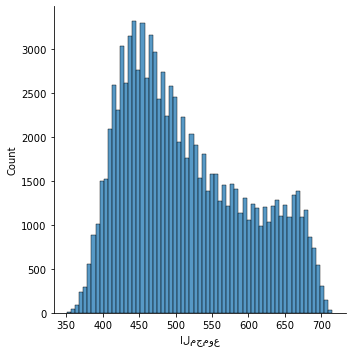

In [25]:
sns.displot(x='المجموع', data=data);